In [29]:
import gzip
import matplotlib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analsis
First step of any Data Science process is getting to know the data. In this step we will check:
- if any values in the dataset are missing or duplicated, 
- which variables are categorical, ordinal and numeric
- cardinality of categorical variables
- distributions of numeric variables 
<br/><br/>
We will start with extracting the data into a pandas DataFrame.

In [30]:
def get_extracted_dataframe(path: str) -> pd.DataFrame:
    """Helper function to extract gzip archive as pandas DataFrame."""
    with gzip.open(path, "rb") as file:
        return pd.read_csv(file)

In [31]:
order_data = get_extracted_dataframe("../data/machine_learning_challenge_order_data.csv.gz")
labeled_data = get_extracted_dataframe("../data/machine_learning_challenge_labeled_data.csv.gz")

Let's merge order dataset with labels and get some general idea about our data by checking the variables and DataFrame's head.

In [32]:
order_data_labeled = order_data.merge(labeled_data, on="customer_id")
order_data_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786600 entries, 0 to 786599
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_id            786600 non-null  object 
 1   order_date             786600 non-null  object 
 2   order_hour             786600 non-null  int64  
 3   customer_order_rank    761833 non-null  float64
 4   is_failed              786600 non-null  int64  
 5   voucher_amount         786600 non-null  float64
 6   delivery_fee           786600 non-null  float64
 7   amount_paid            786600 non-null  float64
 8   restaurant_id          786600 non-null  int64  
 9   city_id                786600 non-null  int64  
 10  payment_id             786600 non-null  int64  
 11  platform_id            786600 non-null  int64  
 12  transmission_id        786600 non-null  int64  
 13  is_returning_customer  786600 non-null  int64  
dtypes: float64(4), int64(8), object(2)
m

In [33]:
order_data_labeled.head(10)

,customer_id,order_date,order_hour,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id,is_returning_customer
0,000097eabfd9,2015-06-20,19,1.0,0,0.0,0.000,11.46960,5803498,20326,1779,30231,4356,0
1,0000e2c6d9be,2016-01-29,20,1.0,0,0.0,0.000,9.55800,239303498,76547,1619,30359,4356,0
2,000133bb597f,2017-02-26,19,1.0,0,0.0,0.493,5.93658,206463498,33833,1619,30359,4324,1
3,00018269939b,2017-02-05,17,1.0,0,0.0,0.493,9.82350,36613498,99315,1619,30359,4356,0
4,0001a00468a6,2015-08-04,19,1.0,0,0.0,0.493,5.15070,225853498,16456,1619,29463,4356,0
5,0001d9036b5e,2015-08-29,19,1.0,0,0.0,0.000,11.94750,193643498,88276,1619,29463,4356,0
6,0001d9036b5e,2017-01-04,17,2.0,0,0.0,0.000,11.15100,193643498,88276,1619,29463,4356,0
7,0001d9036b5e,2017-01-28,16,3.0,0,0.0,0.000,9.71730,193643498,88276,1619,30359,4356,0
8,0001e1e04d7d,2015-10-24,19,1.0,0,0.0,0.000,25.22250,144833498,45358,1619,29463,4356,1
9,0001e1e04d7d,2016-03-24,19,2.0,0,0.0,0.000,9.29250,95953498,45358,1619,29463,4324,1


## Null values
After we have some idea about our data, let's check for nulls.

In [34]:
order_data_labeled.isna().sum()

customer_id                  0
order_date                   0
order_hour                   0
customer_order_rank      24767
is_failed                    0
voucher_amount               0
delivery_fee                 0
amount_paid                  0
restaurant_id                0
city_id                      0
payment_id                   0
platform_id                  0
transmission_id              0
is_returning_customer        0
dtype: int64

Only `customer_order_rank` contains any null values. From our dataset description we know, that successful orders are indexed at `1`, so we can safely fill those values with zeros.

In [35]:
order_data_labeled.fillna(value=0, inplace=True)

Making sure that all nulls got filled.

In [36]:
order_data_labeled.isna().sum()

customer_id              0
order_date               0
order_hour               0
customer_order_rank      0
is_failed                0
voucher_amount           0
delivery_fee             0
amount_paid              0
restaurant_id            0
city_id                  0
payment_id               0
platform_id              0
transmission_id          0
is_returning_customer    0
dtype: int64

## Duplicated rows
Pandas treats nans as non equal floats, so `nan == nan` is `False`. That's why it's important to deal with nulls before duplicates. Let's check if we have any in our order dataset.

In [47]:
order_data_labeled.duplicated().sum()

546

There were 546 duplicated rows in the dataset. We will remove them, while only keeping the first occurrence. Then we'll make sure that we properly got rid of them.

In [52]:
order_data_labeled.drop_duplicates(keep="first", inplace=True)

In [53]:
order_data_labeled.duplicated().sum()

0

## Categorical variable cardinality, counts and relations to the label

In [91]:
order_data_labeled[["restaurant_id", "city_id",	"payment_id", "platform_id","transmission_id"]].\
apply(pd.Series.nunique)

restaurant_id      13569
city_id             3749
payment_id             5
platform_id           14
transmission_id       10
dtype: int64

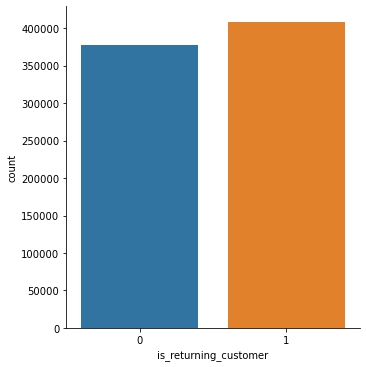

In [55]:
sns.catplot(data=order_data_labeled, kind="count", x="is_returning_customer")

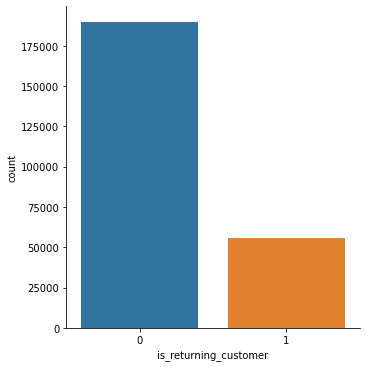

In [56]:
sns.catplot(data=labeled_data, kind="count", x="is_returning_customer")

Seems that returning customers are much smaller in number, but make more orders than non-returning customers. This gives me the idea to create a model based on labeled dataset, where number of completed orders will certainly be an importnat feature.  

Let's check if other categorical variables give us any valuable information.

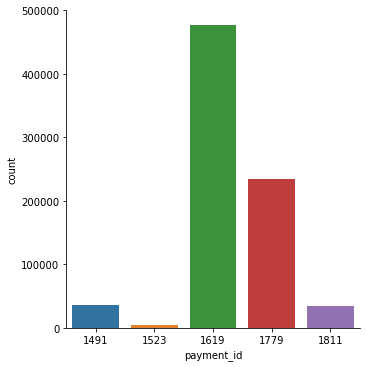

In [87]:
sns.catplot(data=order_data_labeled, kind="count", x="payment_id")

In [58]:
order_data_labeled[["payment_id", "is_returning_customer"]].groupby("payment_id").mean()

,is_returning_customer
payment_id,
1491,0.538900
1523,0.829831
1619,0.483982
1779,0.571023
1811,0.602295


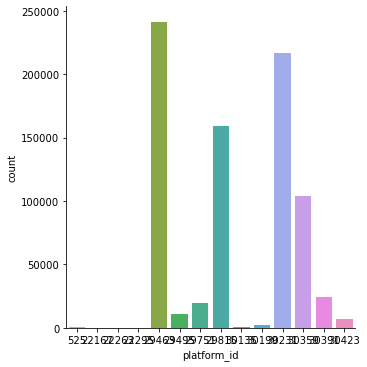

In [88]:
sns.catplot(data=order_data_labeled, kind="count", x="platform_id")

In [59]:
order_data_labeled[["platform_id", "is_returning_customer"]].groupby("platform_id").mean()

,is_returning_customer
platform_id,
525,0.189214
22167,0.333333
22263,0.250000
22295,1.000000
29463,0.491417
29495,0.315516
29751,0.637527
29815,0.570695
30135,0.560811


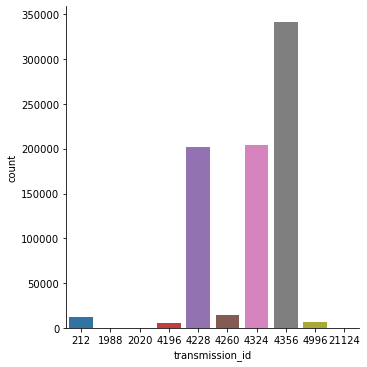

In [89]:
sns.catplot(data=order_data_labeled, kind="count", x="transmission_id")

In [60]:
order_data_labeled[["transmission_id", "is_returning_customer"]].groupby("transmission_id").mean()

,is_returning_customer
transmission_id,
212,0.572944
1988,0.734300
2020,1.000000
4196,0.486164
4228,0.542175
4260,0.489063
4324,0.485258
4356,0.523720
4996,0.685328


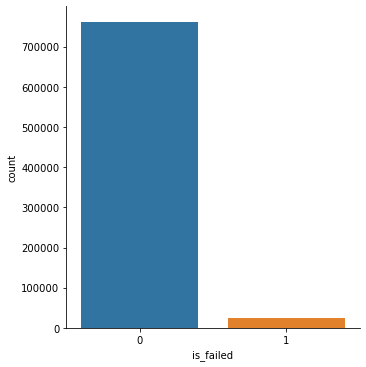

In [90]:
sns.catplot(data=order_data_labeled, kind="count", x="is_failed")

In [61]:
order_data_labeled[["is_failed", "is_returning_customer"]].groupby("is_failed").mean()

,is_returning_customer
is_failed,
0,0.518822
1,0.548697


## Numeric variable distributions

<AxesSubplot:xlabel='amount_paid', ylabel='Count'>

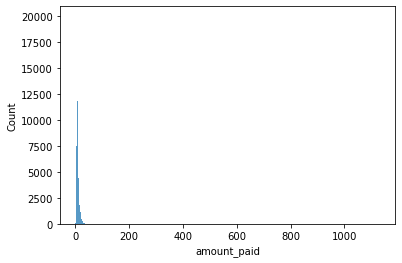

In [83]:
sns.histplot(order_data_labeled["amount_paid"])

<AxesSubplot:xlabel='delivery_fee', ylabel='Count'>

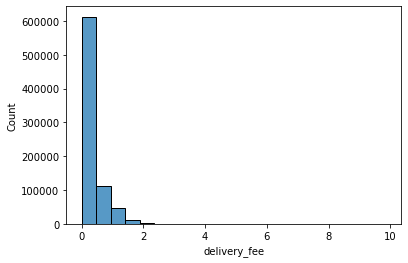

In [84]:
sns.histplot(order_data_labeled["delivery_fee"])

<AxesSubplot:xlabel='voucher_amount', ylabel='Count'>

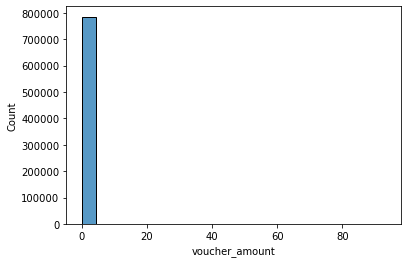

In [85]:
sns.histplot(order_data_labeled["voucher_amount"])

Seems that our categorical variables tend to differ in counts and their influence on the label. High cardinality is an issue for `restaurant_id` and `city_id`. My idea is to aggregate variables from order dataset into customer-centric features. We will use cumulative sum of numeric variables and use most frequently used categorical variables per customer.

In [93]:
order_data_labeled.groupby("customer_id").agg(pd.Series.mode).to_frame()

,order_date,customer_order_rank,voucher_amount,delivery_fee,amount_paid,is_returning_customer
customer_id,,,,,,
000097eabfd9,2015-06-20,1,0,0,11.4696,0
0000e2c6d9be,2016-01-29,1,0,0,9.558,0
000133bb597f,2017-02-26,1,0,0.493,5.93658,1
00018269939b,2017-02-05,1,0,0.493,9.8235,0
0001a00468a6,2015-08-04,1,0,0.493,5.1507,0
...,...,...,...,...,...,...
fffd696eaedd,2015-09-14,1,0,1.4297,24.1339,0
fffe9d5a8d41,2016-09-30,0,0,0,10.7262,1
ffff347c3cfa,"[2016-08-17, 2016-09-15]","[1.0, 2.0]",0,0,"[5.9472, 7.5933]",1
